## Letter Model: Mallet

## Resources

In [100]:
import pickle
import gensim
import gensim.corpora as corpora
#from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [109]:
# Corpus
with open("20240608_PhD_LtrLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)
    
len(data_lemmatizedNouns)

676

In [110]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [111]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6505 unique tokens: ['air', 'apron', 'bye', 'ceremony', 'cermony']...)


This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## 1. LDA Mallet (settings equivalent to the non-wrapper version)

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=400, random_seed=100, optimize_interval=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [1]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=5, 
#                                                       limit=30, 
#                                                        step=1)

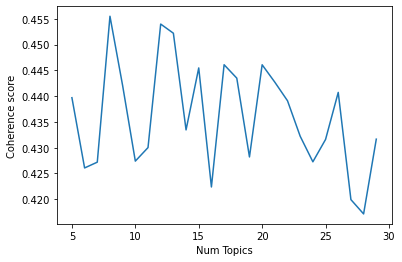

In [9]:
# Show graph
limit=30; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [10]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4397
Num Topics = 6 Coherence:  0.4261
Num Topics = 7 Coherence:  0.4272
Num Topics = 8 Coherence:  0.4555
Num Topics = 9 Coherence:  0.442
Num Topics = 10 Coherence:  0.4274
Num Topics = 11 Coherence:  0.43
Num Topics = 12 Coherence:  0.454
Num Topics = 13 Coherence:  0.4522
Num Topics = 14 Coherence:  0.4335
Num Topics = 15 Coherence:  0.4455
Num Topics = 16 Coherence:  0.4224
Num Topics = 17 Coherence:  0.4461
Num Topics = 18 Coherence:  0.4435
Num Topics = 19 Coherence:  0.4282
Num Topics = 20 Coherence:  0.4461
Num Topics = 21 Coherence:  0.4427
Num Topics = 22 Coherence:  0.4391
Num Topics = 23 Coherence:  0.4322
Num Topics = 24 Coherence:  0.4273
Num Topics = 25 Coherence:  0.4316
Num Topics = 26 Coherence:  0.4407
Num Topics = 27 Coherence:  0.4199
Num Topics = 28 Coherence:  0.4172
Num Topics = 29 Coherence:  0.4317


In [16]:
# Coherence for 8-topic model
print(coherence_values[3])

# Topics for 8-topic model
malletModel_08 = model_list[3]
model_topics_08 = malletModel_08.show_topics(formatted=False)
pprint(sorted(malletModel_08.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA08 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_08)

# Visualize the topics
pyLDAvis.enable_notebook()
vis08 = pyLDAvis.gensim.prepare(MalletLDA08, corpus, id2word, sort_topics=False)
vis08

0.4555123803601751
[(0,
  '0.080*"letter" + 0.057*"time" + 0.038*"day" + 0.025*"month" + '
  '0.019*"friend" + 0.018*"home" + 0.016*"health" + 0.014*"place" + '
  '0.013*"sister" + 0.013*"return" + 0.013*"pleasure" + 0.012*"weather" + '
  '0.012*"news" + 0.011*"opportunity" + 0.010*"happiness" + 0.009*"thing" + '
  '0.009*"father" + 0.009*"manner" + 0.009*"trust" + 0.009*"kind"'),
 (1,
  '0.025*"dollar" + 0.020*"cent" + 0.019*"pound" + 0.016*"year" + 0.016*"man" '
  '+ 0.015*"money" + 0.014*"business" + 0.012*"board" + 0.011*"country" + '
  '0.011*"month" + 0.011*"land" + 0.011*"government" + 0.009*"employment" + '
  '0.009*"expense" + 0.008*"company" + 0.008*"gold" + 0.007*"kind" + '
  '0.007*"wage" + 0.007*"purchase" + 0.007*"thousand"'),
 (2,
  '0.043*"brother" + 0.042*"mother" + 0.040*"letter" + 0.037*"friend" + '
  '0.037*"family" + 0.026*"child" + 0.026*"time" + 0.025*"sister" + '
  '0.024*"year" + 0.020*"wife" + 0.020*"son" + 0.019*"health" + '
  '0.019*"daughter" + 0.018*"death

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.226828 -0.052368       1        1  15.997363
1      0.238430 -0.126709       2        1   8.928944
2     -0.187594 -0.184755       3        1  14.858883
3     -0.099117 -0.094031       4        1  10.966502
4      0.012245 -0.040076       5        1  13.416087
5      0.280943 -0.066500       6        1  11.233274
6      0.084308  0.274878       7        1  10.966149
7     -0.102387  0.289561       8        1  13.632798, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1189.000000  1189.000000  Default  30.0000  30.0000
78      week   595.000000   595.000000  Default  29.0000  29.0000
57      time  1191.000000  1191.000000  Default  28.0000  28.0000
31   brother   400.000000   400.000000  Default  27.0000  27.0000
97    mother   391.000000   391.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
121    house   103.831791   369.113054   Topic8  -4.4134   0.7244
319    clock    51.915896    89.454657   Topic8  -5.1065   1.4486
41      home    88.562410   542.938062   Topic8  -4.5725   0.1794
75   trouble    54.969772   161.943773   Topic8  -5.0494   0.9122
401   change    48.862020   123.906027   Topic8  -5.1672   1.0622

[744 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1090      5  0.960882    ability
28        1  0.192993    account
28        2  0.091418    account
28        3  0.380907    account
28        5  0.243780    account
...     ...       ...        ...
61        5  0.242469       year
61        6  0.268350       year
62        7  0.219370  yesterday
62        8  0.779981  yesterday
4194      6  1.017899       yoke

[1137 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

## 2. A range of iterations

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for iterations in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, iterations=iterations, id2word=id2word, random_seed=100, optimize_interval=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [2]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=500, 
#                                                        limit=5500, 
#                                                        step=500)

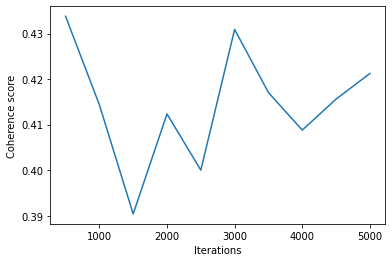

In [19]:
# Show graph
limit=5500; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [20]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Iterations =", m, 'Coherence: ', round(cv, 4))

Iterations = 500 Coherence:  0.4338
Iterations = 1000 Coherence:  0.4144
Iterations = 1500 Coherence:  0.3904
Iterations = 2000 Coherence:  0.4123
Iterations = 2500 Coherence:  0.4
Iterations = 3000 Coherence:  0.4309
Iterations = 3500 Coherence:  0.417
Iterations = 4000 Coherence:  0.4088
Iterations = 4500 Coherence:  0.4156
Iterations = 5000 Coherence:  0.4212


Since increading iterations was the only way to increase the c_v score, and this does not seem to work when I have optimization on, I am going to turn this function off and return to the non-optimized 8-topic model.

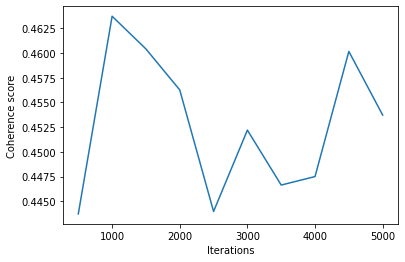

In [22]:
# Show graph
limit=5500; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [24]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Iterations =", m, 'Coherence: ', round(cv, 4))

Iterations = 500 Coherence:  0.4437
Iterations = 1000 Coherence:  0.4637
Iterations = 1500 Coherence:  0.4604
Iterations = 2000 Coherence:  0.4563
Iterations = 2500 Coherence:  0.444
Iterations = 3000 Coherence:  0.4522
Iterations = 3500 Coherence:  0.4466
Iterations = 4000 Coherence:  0.4475
Iterations = 4500 Coherence:  0.4602
Iterations = 5000 Coherence:  0.4537


In [25]:
# Coherence for 8-topic model, iterations 1K
print(coherence_values[1])

# Topics for 8-topic model, iterations 1K
malletModel_08i1k = model_list[1]
model_topics_08i1k = malletModel_08i1k.show_topics(formatted=False)
pprint(sorted(malletModel_08i1k.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA08i1k = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_08i1k)

# Visualize the topics
pyLDAvis.enable_notebook()
vis08i1k = pyLDAvis.gensim.prepare(MalletLDA08i1k, corpus, id2word, sort_topics=False)
vis08i1k

0.4637315235411022
[(0,
  '0.107*"letter" + 0.075*"time" + 0.026*"day" + 0.026*"month" + '
  '0.025*"friend" + 0.018*"pleasure" + 0.017*"news" + 0.015*"sister" + '
  '0.015*"home" + 0.014*"health" + 0.013*"return" + 0.013*"opportunity" + '
  '0.013*"happiness" + 0.012*"kind" + 0.012*"writing" + 0.011*"manner" + '
  '0.011*"trust" + 0.011*"father" + 0.011*"care" + 0.011*"weather"'),
 (1,
  '0.032*"dollar" + 0.030*"year" + 0.028*"man" + 0.027*"work" + 0.024*"people" '
  '+ 0.022*"money" + 0.019*"business" + 0.018*"country" + 0.015*"cent" + '
  '0.012*"company" + 0.011*"expense" + 0.011*"board" + 0.011*"pay" + '
  '0.010*"month" + 0.009*"government" + 0.009*"wage" + 0.009*"lot" + '
  '0.009*"number" + 0.008*"office" + 0.008*"state"'),
 (2,
  '0.052*"brother" + 0.051*"mother" + 0.051*"friend" + 0.048*"family" + '
  '0.041*"letter" + 0.032*"year" + 0.032*"sister" + 0.030*"health" + '
  '0.027*"child" + 0.026*"son" + 0.025*"death" + 0.025*"wife" + '
  '0.023*"daughter" + 0.018*"uncle" + 0.01

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.277588 -0.043278       1        1  12.553826
1      0.191726 -0.224310       2        1  12.648418
2     -0.299279 -0.063645       3        1  11.925504
3     -0.022796 -0.012987       4        1  13.204409
4      0.006097 -0.039025       5        1  11.643314
5      0.203484 -0.159199       6        1  13.857467
6      0.151334  0.179986       7        1  13.102579
7      0.047022  0.362457       8        1  11.064484, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1151.000000  1151.000000  Default  30.0000  30.0000
57      time  1176.000000  1176.000000  Default  29.0000  29.0000
78      week   584.000000   584.000000  Default  28.0000  28.0000
8        day  1080.000000  1080.000000  Default  27.0000  27.0000
84    friend   577.000000   577.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
5     church    64.641893   145.690399   Topic8  -4.6786   1.3888
1047  window    42.763098    56.271183   Topic8  -5.0918   1.9269
177     room    63.647402   185.190634   Topic8  -4.6941   1.1334
8        day    70.608836  1080.379179   Topic8  -4.5903  -0.5265
947     call    42.763098    88.701348   Topic8  -5.0918   1.4718

[604 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1090      2  0.952176       ability
28        1  0.280295       account
28        2  0.207626       account
28        3  0.513874       account
186       1  0.980943  acquaintance
...     ...       ...           ...
61        3  0.328790          year
61        4  0.025814          year
61        6  0.320638          year
62        7  0.376138     yesterday
62        8  0.629623     yesterday

[699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

## 3. A range of alphas

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for alpha in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, alpha=alpha, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [10]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        #corpus=corpus, 
                                                        #texts=data_lemmatizedNouns, 
                                                        #start=1, 
                                                        #limit=50, 
                                                        #step=4)

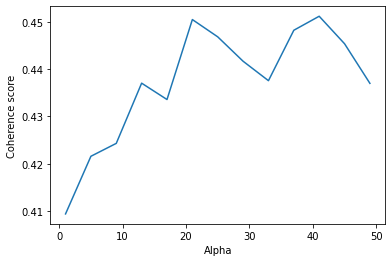

In [65]:
# Show graph
limit=50; start=1; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [67]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 1 Coherence:  0.4094
Alpha = 5 Coherence:  0.4216
Alpha = 9 Coherence:  0.4243
Alpha = 13 Coherence:  0.437
Alpha = 17 Coherence:  0.4336
Alpha = 21 Coherence:  0.4505
Alpha = 25 Coherence:  0.4468
Alpha = 29 Coherence:  0.4417
Alpha = 33 Coherence:  0.4376
Alpha = 37 Coherence:  0.4482
Alpha = 41 Coherence:  0.4512
Alpha = 45 Coherence:  0.4454
Alpha = 49 Coherence:  0.437


In [3]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=50, 
#                                                        limit=70, 
#                                                        step=2)

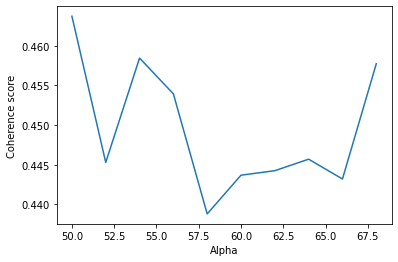

In [15]:
# Show graph
limit=70; start=50; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [16]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 50 Coherence:  0.4637
Alpha = 52 Coherence:  0.4453
Alpha = 54 Coherence:  0.4585
Alpha = 56 Coherence:  0.4539
Alpha = 58 Coherence:  0.4388
Alpha = 60 Coherence:  0.4437
Alpha = 62 Coherence:  0.4443
Alpha = 64 Coherence:  0.4457
Alpha = 66 Coherence:  0.4432
Alpha = 68 Coherence:  0.4577


Not extracting and visualizing topics because the results are the same as in step 2.

## 4. Optimize hyperparameters

In [112]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for optimize_interval in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, optimize_interval=optimize_interval, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [4]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                       start=100, 
#                                                        limit=700, 
#                                                        step=100)

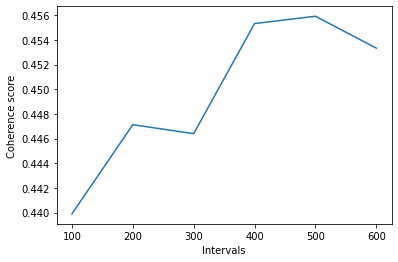

In [31]:
# Show graph
limit=700; start=100; step=100;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Intervals")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [33]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Intervals =", m, 'Coherence: ', round(cv, 4))

Intervals = 100 Coherence:  0.4399
Intervals = 200 Coherence:  0.4471
Intervals = 300 Coherence:  0.4464
Intervals = 400 Coherence:  0.4553
Intervals = 500 Coherence:  0.4559
Intervals = 600 Coherence:  0.4533


In [38]:
# Coherence for 8-topic model, iterations 1K, alpha 50, optimization intervals 500
print(coherence_values[4])

# Topics for 8-topic model, iterations 1K, alpha 50, optimization intervals 500
malletModel_08i1ka5o5 = model_list[4]
model_topics_08i1ka5o5 = malletModel_08i1ka5o5.show_topics(formatted=False)
pprint(sorted(malletModel_08i1ka5o5.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA08i1ka5o5 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_08i1ka5o5)

# Visualize the topics
pyLDAvis.enable_notebook()
vis08i1ka5o5 = pyLDAvis.gensim.prepare(MalletLDA08i1ka5o5, corpus, id2word, sort_topics=False)
vis08i1ka5o5

0.4559120696226197
[(0,
  '0.102*"letter" + 0.060*"time" + 0.025*"day" + 0.021*"news" + 0.021*"friend" '
  '+ 0.019*"month" + 0.016*"pleasure" + 0.015*"health" + 0.013*"return" + '
  '0.013*"kind" + 0.013*"sister" + 0.013*"place" + 0.013*"happiness" + '
  '0.012*"opportunity" + 0.012*"father" + 0.011*"manner" + 0.011*"trust" + '
  '0.011*"weather" + 0.011*"writing" + 0.010*"darling"'),
 (1,
  '0.037*"year" + 0.036*"people" + 0.028*"man" + 0.027*"country" + '
  '0.022*"business" + 0.012*"company" + 0.011*"place" + 0.011*"city" + '
  '0.010*"state" + 0.010*"office" + 0.010*"government" + 0.008*"interest" + '
  '0.008*"gold" + 0.007*"land" + 0.007*"fact" + 0.006*"difficulty" + '
  '0.006*"side" + 0.006*"party" + 0.006*"person" + 0.006*"account"'),
 (2,
  '0.052*"brother" + 0.051*"mother" + 0.046*"family" + 0.045*"friend" + '
  '0.044*"letter" + 0.033*"sister" + 0.028*"health" + 0.028*"child" + '
  '0.026*"year" + 0.024*"wife" + 0.021*"son" + 0.019*"death" + 0.019*"home" + '
  '0.018*"daug

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.187511 -0.073404       1        1  13.048161
1      0.240075 -0.131138       2        1  11.766209
2     -0.215105 -0.173920       3        1  12.210770
3     -0.122454 -0.123387       4        1  12.824514
4     -0.012930  0.069981       5        1  11.808199
5      0.275557 -0.111127       6        1  14.057220
6      0.111670  0.224987       7        1  12.829418
7     -0.089303  0.318007       8        1  11.455509, topic_info=         Term         Freq        Total Category  logprob  loglift
11     letter  1187.000000  1187.000000  Default  30.0000  30.0000
57       time  1198.000000  1198.000000  Default  29.0000  29.0000
78       week   594.000000   594.000000  Default  28.0000  28.0000
8         day  1088.000000  1088.000000  Default  27.0000  27.0000
31    brother   397.000000   397.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
5      church    61.601339   146.764428   Topic8  -4.7615   1.2986
2296  captain    42.414037    73.455184   Topic8  -5.1347   1.6175
8         day    93.916796  1088.808584   Topic8  -4.3397  -0.2837
979     store    46.453469   103.713712   Topic8  -5.0437   1.3635
41       home    52.512617   541.680039   Topic8  -4.9211  -0.1669

[695 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
28        1  0.229574    account
28        2  0.209167    account
28        3  0.494860    account
28        5  0.061220    account
677       5  0.960527       acct
...     ...       ...        ...
61        6  0.268929       year
62        5  0.016240  yesterday
62        7  0.251715  yesterday
62        8  0.730786  yesterday
5553      3  0.995030       youe

[987 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

Given that the intial model showed higher performance with an optimization setting of 20, I am going to try smaller values here.

In [5]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=1, 
#                                                        limit=100, 
#                                                        step=3)

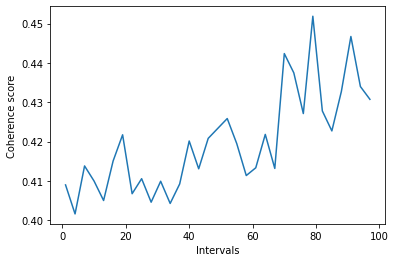

In [114]:
# Show graph
limit=100; start=1; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Intervals")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [115]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Intervals =", m, 'Coherence: ', round(cv, 4))

Intervals = 1 Coherence:  0.409
Intervals = 4 Coherence:  0.4016
Intervals = 7 Coherence:  0.4138
Intervals = 10 Coherence:  0.41
Intervals = 13 Coherence:  0.4051
Intervals = 16 Coherence:  0.4151
Intervals = 19 Coherence:  0.4217
Intervals = 22 Coherence:  0.4068
Intervals = 25 Coherence:  0.4106
Intervals = 28 Coherence:  0.4046
Intervals = 31 Coherence:  0.4099
Intervals = 34 Coherence:  0.4043
Intervals = 37 Coherence:  0.4093
Intervals = 40 Coherence:  0.4202
Intervals = 43 Coherence:  0.4131
Intervals = 46 Coherence:  0.4208
Intervals = 49 Coherence:  0.4234
Intervals = 52 Coherence:  0.4259
Intervals = 55 Coherence:  0.4195
Intervals = 58 Coherence:  0.4114
Intervals = 61 Coherence:  0.4134
Intervals = 64 Coherence:  0.4218
Intervals = 67 Coherence:  0.4132
Intervals = 70 Coherence:  0.4424
Intervals = 73 Coherence:  0.4375
Intervals = 76 Coherence:  0.4271
Intervals = 79 Coherence:  0.4518
Intervals = 82 Coherence:  0.4278
Intervals = 85 Coherence:  0.4227
Intervals = 88 Coher

c_v scores do not improve with tuning the optimize_intervals parameter but the topic visualization is a smidge more clear with the 500 setting so saving that along with the best model (08i1k).

In [40]:
# Non-optimized Parameters
MalletLDA08i1k.save('20240611_PhD_TopicLtrMAL08i1ka5')
pyLDAvis.save_html(vis08i1k, '20240611_PhD_TopicLtrMAL08i1ka5.html')

In [39]:
# Optimized Parameters
MalletLDA08i1ka5o5.save('20240611_PhD_TopicLtrMAL08i1ka5o5')
pyLDAvis.save_html(vis08i1ka5o5, '20240611_PhD_TopicLtrMAL08i1ka5o5.html')

## 5. Testing a range of random seeds

In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for random_seed in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, random_seed=random_seed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [6]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                       start=10, 
#                                                        limit=110, 
#                                                        step=10)

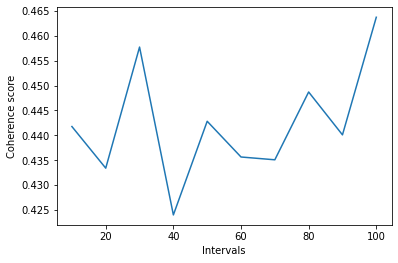

In [48]:
# Show graph
limit=110; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Intervals")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [49]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Seed =", m, 'Coherence: ', round(cv, 4))

Seed = 10 Coherence:  0.4418
Seed = 20 Coherence:  0.4334
Seed = 30 Coherence:  0.4577
Seed = 40 Coherence:  0.424
Seed = 50 Coherence:  0.4428
Seed = 60 Coherence:  0.4357
Seed = 70 Coherence:  0.4351
Seed = 80 Coherence:  0.4487
Seed = 90 Coherence:  0.4401
Seed = 100 Coherence:  0.4637


In [51]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for random_seed in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, random_seed=random_seed, optimize_interval=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [7]:
# Can take a long time to run.
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=10, 
#                                                        limit=110, 
#                                                        step=10)

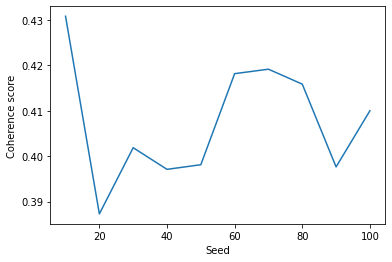

In [53]:
# Show graph
limit=110; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Seed")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [54]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Seed =", m, 'Coherence: ', round(cv, 4))

Seed = 10 Coherence:  0.4308
Seed = 20 Coherence:  0.3873
Seed = 30 Coherence:  0.4019
Seed = 40 Coherence:  0.3971
Seed = 50 Coherence:  0.3981
Seed = 60 Coherence:  0.4181
Seed = 70 Coherence:  0.4191
Seed = 80 Coherence:  0.4158
Seed = 90 Coherence:  0.3976
Seed = 100 Coherence:  0.41


## 6. Examining the 10-seed results

In [56]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=10, optimize_interval=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [8]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
#                                                        corpus=corpus, 
#                                                        texts=data_lemmatizedNouns, 
#                                                        start=5, 
#                                                        limit=30, 
#                                                        step=1)

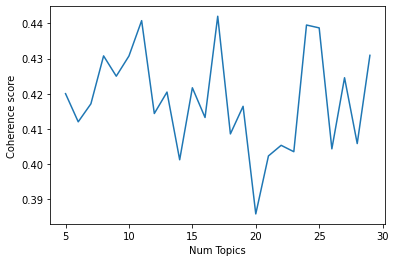

In [58]:
# Show graph
limit=30; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [59]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Seed =", m, 'Coherence: ', round(cv, 4))

Seed = 5 Coherence:  0.42
Seed = 6 Coherence:  0.412
Seed = 7 Coherence:  0.4171
Seed = 8 Coherence:  0.4308
Seed = 9 Coherence:  0.425
Seed = 10 Coherence:  0.4307
Seed = 11 Coherence:  0.4408
Seed = 12 Coherence:  0.4144
Seed = 13 Coherence:  0.4205
Seed = 14 Coherence:  0.4012
Seed = 15 Coherence:  0.4217
Seed = 16 Coherence:  0.4132
Seed = 17 Coherence:  0.4421
Seed = 18 Coherence:  0.4086
Seed = 19 Coherence:  0.4164
Seed = 20 Coherence:  0.3858
Seed = 21 Coherence:  0.4023
Seed = 22 Coherence:  0.4053
Seed = 23 Coherence:  0.4035
Seed = 24 Coherence:  0.4396
Seed = 25 Coherence:  0.4387
Seed = 26 Coherence:  0.4043
Seed = 27 Coherence:  0.4245
Seed = 28 Coherence:  0.4058
Seed = 29 Coherence:  0.4309


There is no real pattern here except that 11 and 17 reflect the higher coherence scores shown in the very first model run (that is, the one with 400 iterations). I am going to stick with the 8-topic setting from the 100-seed run.